# ChatGPT Usage Heatmap
This notebook helps you visualize your ChatGPT usage over a year in the form of a heatmap. Follow the steps to replicate this for your own data.


## Importing necessary libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from collections import Counter
from datetime import datetime, timedelta
import pandas as pd


## Define the Heatmap Function

In [2]:
def create_year_heatmap(convo_times, year):
    """
    Creates a heatmap for ChatGPT conversation usage over a specified year.

    Parameters:
    - convo_times: List of datetime objects representing conversation timestamps.
    - year: The year for which the heatmap should be created.
    """
    # Convert convo_times to dates and filter for the given year
    just_dates = [convo.date() for convo in convo_times if convo.year == year]

    # Count occurrences of each date
    date_counts = Counter(just_dates)

    # Create a full year's date range
    start_date = datetime(year, 1, 1).date()
    end_date = datetime(year, 12, 31).date()
    total_days = (end_date - start_date).days + 1
    date_range = [start_date + timedelta(days=i) for i in range(total_days)]

    # Prepare data for plotting
    data = []
    for date in date_range:
        week = ((date - start_date).days + start_date.weekday()) // 7
        day_of_week = date.weekday()
        count = date_counts.get(date, 0)
        data.append((week, day_of_week, count))

    # Determine the number of weeks in the year
    weeks_in_year = (end_date - start_date).days // 7 + 1

    # Plot the heatmap
    plt.figure(figsize=(15, 8))
    ax = plt.gca()
    ax.set_aspect('equal')

    # Determine the most active day and 90th percentile for scaling
    max_count_date = max(date_counts, key=date_counts.get, default=start_date)
    max_count = date_counts.get(max_count_date, 0)
    p90_count = np.percentile(list(date_counts.values()), 90) if date_counts else 1

    # Draw the heatmap grid
    for week, day_of_week, count in data:
        color = plt.cm.Greens((count + 1) / p90_count) if count > 0 else 'lightgray'
        rect = patches.Rectangle((week, day_of_week), 1, 1, linewidth=0.5, edgecolor='black', facecolor=color)
        ax.add_patch(rect)

    # Add month labels
    month_starts = [start_date + timedelta(days=i) for i in range(total_days)
                    if (start_date + timedelta(days=i)).day == 1]
    for month_start in month_starts:
        week = (month_start - start_date).days // 7
        plt.text(week + 0.5, 7.75, month_start.strftime('%b'), ha='center', va='center', fontsize=10, rotation=0)

    # Adjustments for readability
    ax.set_xlim(-0.5, weeks_in_year + 0.5)
    ax.set_ylim(-0.5, 8.5)
    plt.title(
        f'{year} ChatGPT Conversation Heatmap (total={sum(date_counts.values())}).\nMost active day: {max_count_date} with {max_count} convos.',
        fontsize=16
    )
    plt.xticks([])
    plt.yticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    plt.gca().invert_yaxis()
    plt.show()


## Load the Data

In [5]:
# Specify the path to the JSON file
file_path = "conversations.json"  # Replace with your file path

# Load data from the JSON file
data = pd.read_json(file_path)

# Convert 'create_time' column to datetime
data['create_time'] = pd.to_datetime(data['create_time'])


## Generate the Heatmap

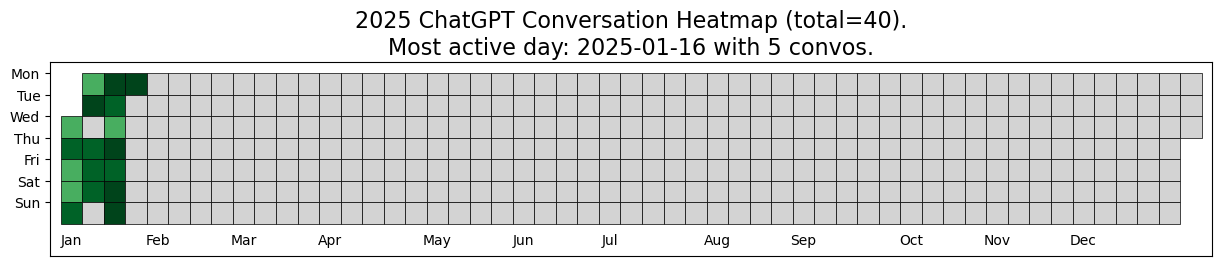

In [7]:
# Generate a heatmap for the year 2025
create_year_heatmap(data['create_time'], year=2025)


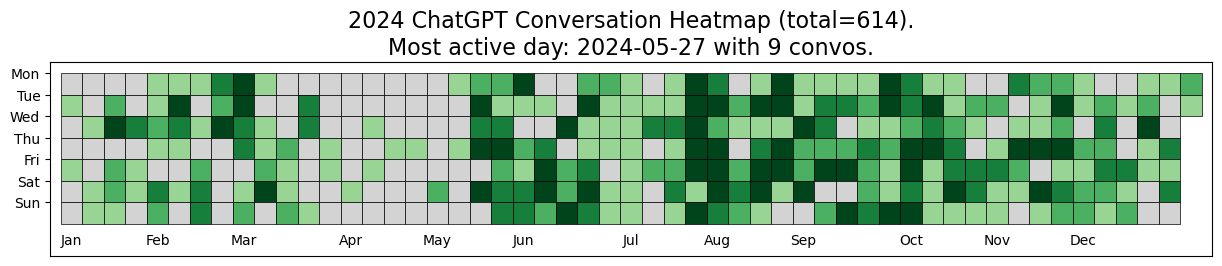

In [9]:
# Generate a heatmap for the year 2024
create_year_heatmap(data['create_time'], year=2024)


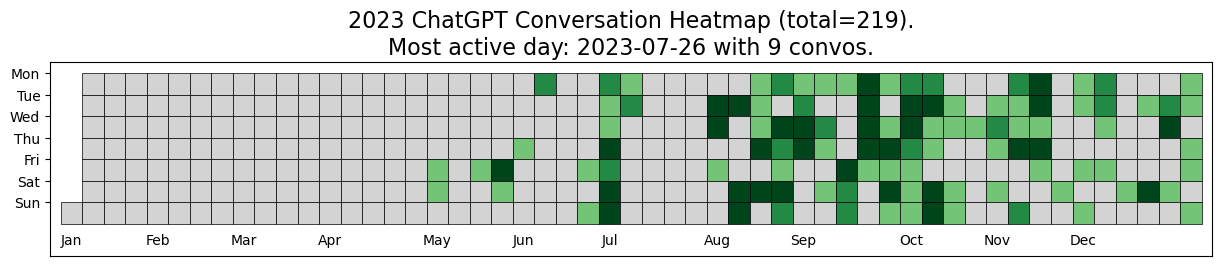

In [10]:
# Generate a heatmap for the year 2023
create_year_heatmap(data['create_time'], year=2023)
